<h1 style = "color : dodgerblue; font-size : 50px"> K Nearest Neighbours (KNN) </h1>

<h2 style = "color : Turquoise"> Importing Libraries </h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h2 style = "color : Turquoise"> Importing Data Set </h2>

In [3]:
df = pd.read_excel('Dataset/Loan Distribution.xlsx')

In [5]:
# top 5 records
df.head()

,Existing Loans,Credit Score,Loan Given
0,0,84,0
1,0,100,0
2,0,100,0
3,0,106,0
4,0,112,0


In [7]:
# bottom 5 records
df.tail()

,Existing Loans,Credit Score,Loan Given
221,3,892,0
222,3,892,0
223,2,894,1
224,2,896,1
225,3,900,0


In [13]:
# columns : 3
# rows : 226
df.shape

(226, 3)

In [15]:
# Splitting dataset into X and Y
# X : Age, Mobile Phone 
# y : Purchased
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [17]:
X

array([[  0,  84],
       [  0, 100],
       [  0, 100],
       [  0, 106],
       [  0, 112],
       [  0, 112],
       [  0, 112],
       [  0, 117],
       [  0, 117],
       [  0, 123],
       [  0, 123],
       [  0, 123],
       [  0, 128],
       [  0, 128],
       [  0, 128],
       [  0, 145],
       [  0, 145],
       [  0, 150],
       [  0, 156],
       [  0, 156],
       [  0, 167],
       [  0, 178],
       [  0, 178],
       [  0, 178],
       [  0, 184],
       [  0, 184],
       [  0, 189],
       [  0, 195],
       [  0, 200],
       [  0, 200],
       [  0, 212],
       [  0, 217],
       [  0, 217],
       [  0, 217],
       [  0, 228],
       [  0, 234],
       [  0, 234],
       [  0, 239],
       [  0, 239],
       [  0, 239],
       [  0, 239],
       [  0, 239],
       [  0, 245],
       [  0, 262],
       [  0, 262],
       [  0, 262],
       [  0, 267],
       [  0, 278],
       [  0, 278],
       [  0, 278],
       [  0, 284],
       [  0, 284],
       [  0,

In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0], dtype=int64)

<h2 style = "color : Turquoise"> Splitting the dataset into Training & Test set </h2>

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

<h2 style = "color : Turquoise"> Feature Scaling </h2>

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

<h2 style = "color : Turquoise"> KNN Training on Training set </h2>

Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

<h2 style = "color : Turquoise"> Predicting </h2>

In [33]:
print(classifier.predict(sc.transform([[0, 578]])))

[1]


<h2 style = "color : Turquoise"> Predicting the Test set results </h2>

In [35]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)),1))

[[1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]]


<h2 style = "color : Turquoise"> Confusion Matrix </h2>

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[37  3]
 [ 5 23]]


0.8823529411764706

<h2 style = "color : Turquoise"> Visualizing Test Set results </h2>

In [41]:
import warnings
warnings.filterwarnings('ignore')

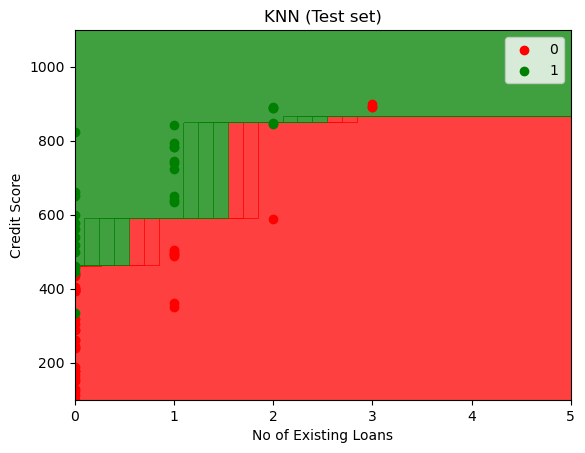

In [47]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0, stop = X_set[:, 0].max() + 3, step = 1),
                     np.arange(start = X_set[:, 1].min() - 0, stop = X_set[:, 1].max() + 200, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['red', 'green'])(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('No of Existing Loans')
plt.ylabel('Credit Score')
plt.legend()
plt.show()

<h2 style = "color : Turquoise"> Visualising Training set results </h2>

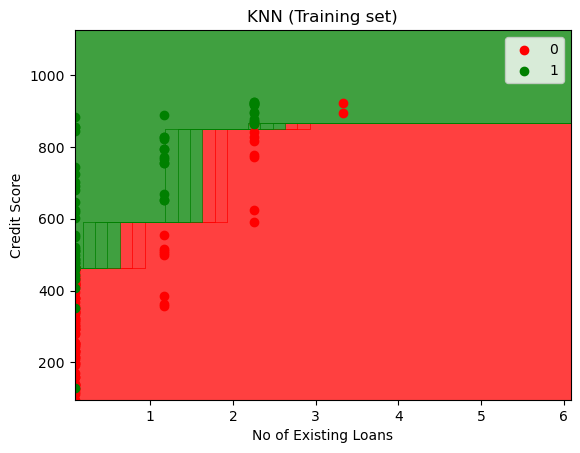

In [49]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0, stop = X_set[:, 0].max() + 3, step = 1),
                     np.arange(start = X_set[:, 1].min() - 0, stop = X_set[:, 1].max() + 200, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['red', 'green'])(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('No of Existing Loans')
plt.ylabel('Credit Score')
plt.legend()
plt.show()